# Machine Learning for Age Prediction using Volumetric Brain MRI: Segmentation and Model Comparison

**Contributers: Jonathan Williams, Eddy Rosales, and Jesse Maki**

---

### **Table of Contents**

1. Background
2. Data Collection   
3. Image Processing
4. Preprocessing + Volume Calculation from Images
4. Descriptive Statistics of MRI-Phantom Dataset   
5. Exploratory Data Analysis of MRI-Phantom Dataset
6. Segmentation Comparisions - FSL vs SynthSeg
7. Descriptive Statistics of IXI Dataset
8. Exploratory Data Analysis of IXI Dataset
9. Segmentation Comparisons - FSL vs SynthSeg on IXI Dataset
10. Machine Learning Methods for Age-Volume Predictions
11. Deep Learning Model for Age-Volume Predictions
12. Discussion and Conclusion
13. Abstract








## Background

Magnetic resonance imaging (MRI) enables noninvasive in vivo quantification of age-related structural changes in the human brain. Manual segmentation of neuroimaging data into anatomically defined regions of interest is an intractable task for large-scale studies. While automated solutions such as FreeSurfer are widely used, these classical segmentation pipelines entail substantial computational demands. Contemporary deep learning approaches provide rapid automated segmentation of MRI volumes, though performance exhibits dependency on brain region characteristics.

In this work, we conduct a quantitative evaluation of a pre-trained convolutional neural network model (SynthSeg) for extracting volumetric biomarkers from structural brain MRIs relevant to cerebral aging. Segmentation accuracy is assessed relative to expert manual labeling across cortical and subcortical structures. Additionally, multivariate regression is performed to predict chronological age based on MRI volumes of key tissue compartments obtained via SynthSeg.

Our investigation elucidates the advantages and limitations of deep learning-based segmentation paradigms for high-throughput quantification of age-related structural phenotypes from neuroimaging data. Findings will inform the appropriation of pre-trained models in large-scale studies relating MRI-derived metrics of brain morphology to cognitive and behavioral measures across the human lifespan.

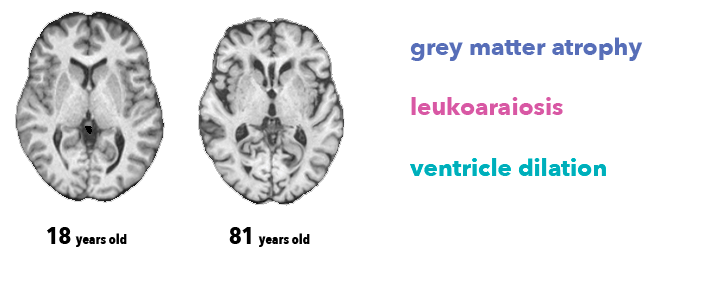

## Data Collection

Two structural MRI datasets were utilized in this analysis to explore brain volume segmentation and age prediction:

The first dataset consists of brain MRIs from the frequently traveling human phantom collected by the University Medical Center Hamburg-Eppendorf. This unique dataset contains 557 3D T1-weighted scans from a single healthy Caucasian male subject aged around 50 years old. The images were acquired over a 2.5 year period across 157 imaging sessions and 116 different MRI scanners throughout Germany. The consistent scanning of the same individual allows analysis of variation across different imaging equipment and sessions.

The second dataset is the publicly available IXI dataset compiled of nearly 600 MR images from normal, healthy subjects aged 20 to 86 years old. This data was aggregated from three hospitals in London using scanners from Philips and GE at field strengths of 1.5T and 3T. The availability of images from multiple subjects across adulthood provides a diverse sample to analyze brain volume changes with age.

Together, these datasets enable investigation of structural MRI segmentation consistency across scans of the same individual and age-related trends across a wider population sample. The following sections will overview the image processing, analysis, and machine learning methods applied to extract insights from these rich data sources

## Image Processing

Need information here

## Preprocessing and Volume Calculations from Images

Volumes were calculated by data processing pipeline to calculate white matter volumes from brain imaging data in the Probabilistic Voxel-based Analysis (PVE) format. It extracts subject IDs, processes PVE data, and computes the volumes for each subject. The calculated volumes are then integrated into an existing CSV file for further analysis and exploration.

In [ ]:
import os
import numpy as np
import nibabel as nib
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

def calculate_and_add_volume(data_directory, pve_suffix, volume_name):
    # Get list of subject IDs
    all_files = os.listdir(data_directory)
    subject_list = [filename.replace(pve_suffix, '') for filename in all_files if filename.endswith(pve_suffix)]

    # Calculate volumes
    volumes = []
    for subject in subject_list:
        pve_file = os.path.join(data_directory, f'{subject}{pve_suffix}')

        # Load PVE file
        pve_data = nib.load(pve_file).get_fdata()

        # Calculate volume
        volume = np.sum(pve_data)

        # Append to list
        volumes.append(volume)

    # Read CSV file
    csv_file_path = 'IXI-FSL.csv'
    csv_data = []

    with open(csv_file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            csv_data.append(row)

    # Add volumes to CSV
    for i, subject_id in enumerate(subject_list):
        numeric_subject_id = extract_numeric_id(subject_id)

        for row in csv_data:
            if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
                row[volume_name] = volumes[i]
                break

    # Write updated CSV
    with open(csv_file_path, 'w', newline='') as csvfile:
        fieldnames = list(csv_data[0].keys())
        if volume_name not in fieldnames:
            fieldnames.append(volume_name)

        csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        csv_writer.writeheader()
        csv_writer.writerows(csv_data)

    print(f"{volume_name} volumes added to the CSV file.")

# Set data directories and calculate volumes for each PVE type
calculate_and_add_volume('PVE/0', '.nii_seg_pve_0.nii.gz', 'WM_VOLUME')
calculate_and_add_volume('PVE/1', '.nii_seg_pve_1.nii.gz', 'GM_VOLUME')
calculate_and_add_volume('PVE/2', '.nii_seg_pve_2.nii.gz', 'CSF_VOLUME')


WM_VOLUME volumes added to the CSV file.
GM_VOLUME volumes added to the CSV file.
CSF_VOLUME volumes added to the CSV file.


## Descriptive Statistics and Exploratory Data Analysis of Phantom Dataset

Need stuff here

## Segementation Comparisons - FSL vs SynthSeg

need information here

## Descriptive Statistics and Exploratory Data Analysis of IXI Dataset

The IXI dataset in use is compromised of ≈600 subjects of T1 weighted MRI Images.

**Contents of IXI.csv**

In [ ]:
df = pd.read_csv('IXI.csv')
print(df.head(5))

   IXI_ID  SEX_ID (1=m, 2=f)  HEIGHT  WEIGHT  ETHNIC_ID  MARITAL_ID   
0       2                  2     164      58          1           4  \
1      12                  1     175      70          1           2   
2      13                  1     182      70          1           2   
3      14                  2     163      65          1           4   
4      15                  1     181      90          2           1   

   OCCUPATION_ID  QUALIFICATION_ID         DOB  DATE_AVAILABLE  STUDY_DATE   
0              1                 5  1970-01-30               1  2005-11-18  \
1              1                 5  1966-08-20               1  2005-06-01   
2              1                 5  1958-09-15               1  2005-06-01   
3              1                 5  1971-03-15               1  2005-06-09   
4              6                 5  1981-03-11               1  2005-06-23   

     AGE  
0  35.80  
1  38.78  
2  46.71  
3  34.24  
4  24.28  


In [ ]:
df = pd.read_csv('IXI.csv')

mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]
min_age = df['AGE'].min()
max_age = df['AGE'].max()
std_dev_age = df['AGE'].std()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode of Age: {mode_age}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Age Standard Deviation: {std_dev_age}")


Mean Age: 49.41638983050848
Median Age: 50.61
Mode of Age: 53.41
Minimum Age: 19.98
Maximum Age: 86.32
Age Standard Deviation: 16.715461362894818


**Demographic Distribution of IXI.csv**

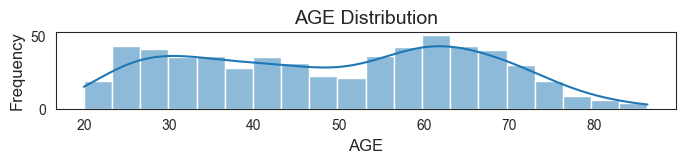

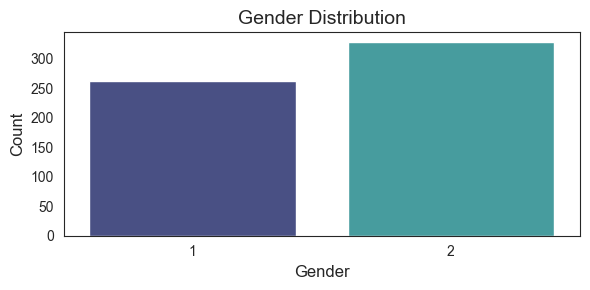

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('IXI.csv')

# Set seaborn style
sns.set_style("white")

# Variables for histograms
hist_vars = ['AGE']

# Create histograms
fig = plt.figure(figsize=(8, len(hist_vars)))

for i, var in enumerate(hist_vars, 1):
    plt.subplot(len(hist_vars), 1, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Add spacing between plots
plt.subplots_adjust(hspace=0.8)

# Gender bar plot
sex_fig = plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='SEX_ID', palette=sns.color_palette("mako", 2))
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Tight layout
plt.tight_layout()

# Show plots
plt.show()


## Segementation Comparisons - FSL vs SynthSeg on IXI Dataset

**Scatter plots of IXI-FSL.csv**

WM_VOLUME Correlation: 0.54
GM_VOLUME Correlation: -0.59
CSF_VOLUME Correlation: -0.33


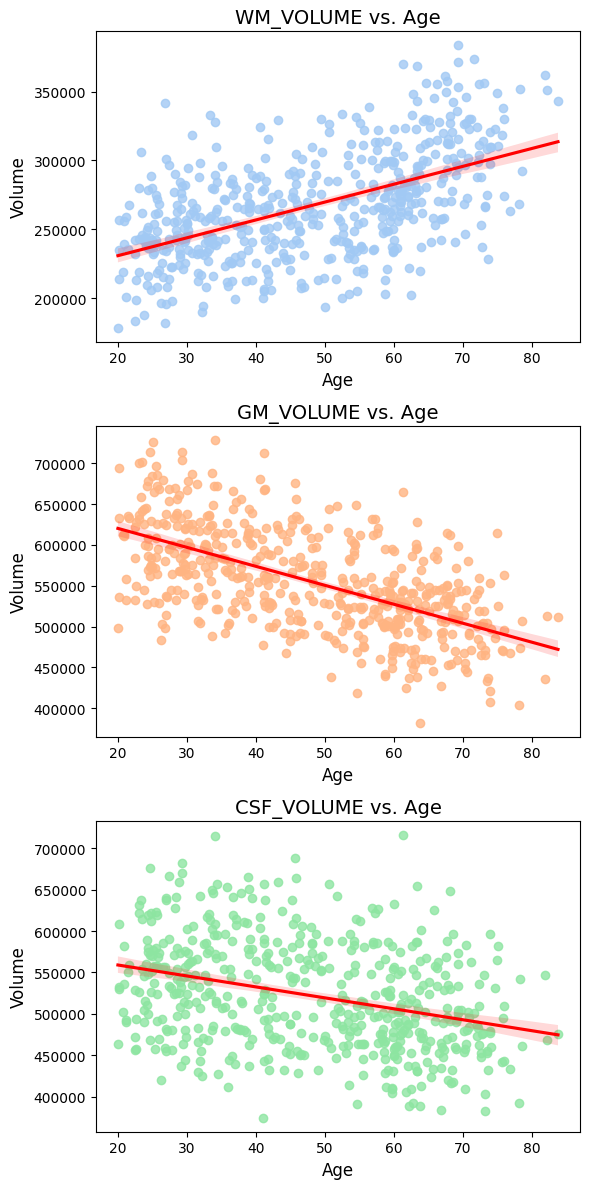

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
brain_vol_df = pd.read_csv('IXI-FSL.csv')

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Define the brain components to analyze
brain_components = ['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME']

# Remove outliers for each brain component
for comp in brain_components:
    brain_vol_df = remove_outliers(brain_vol_df, comp)

# Define color palette
colors = sns.color_palette('pastel', 3)

# Create figure
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

for i, comp in enumerate(brain_components):
    # Plot with regression line
    sns.regplot(data=brain_vol_df, x='AGE', y=comp, scatter_kws={'color': colors[i]}, line_kws={'color': 'red'}, ax=axs[i])

    # Axis labels and title
    axs[i].set_xlabel('Age', fontsize=12)
    axs[i].set_ylabel('Volume', fontsize=12)
    axs[i].set_title(f'{comp} vs. Age', fontsize=14)

    # Calculate and print correlation
    corr = brain_vol_df['AGE'].corr(brain_vol_df[comp])
    print(f'{comp} Correlation: {corr:.2f}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


**Box plots of IXI-FSL.csv**

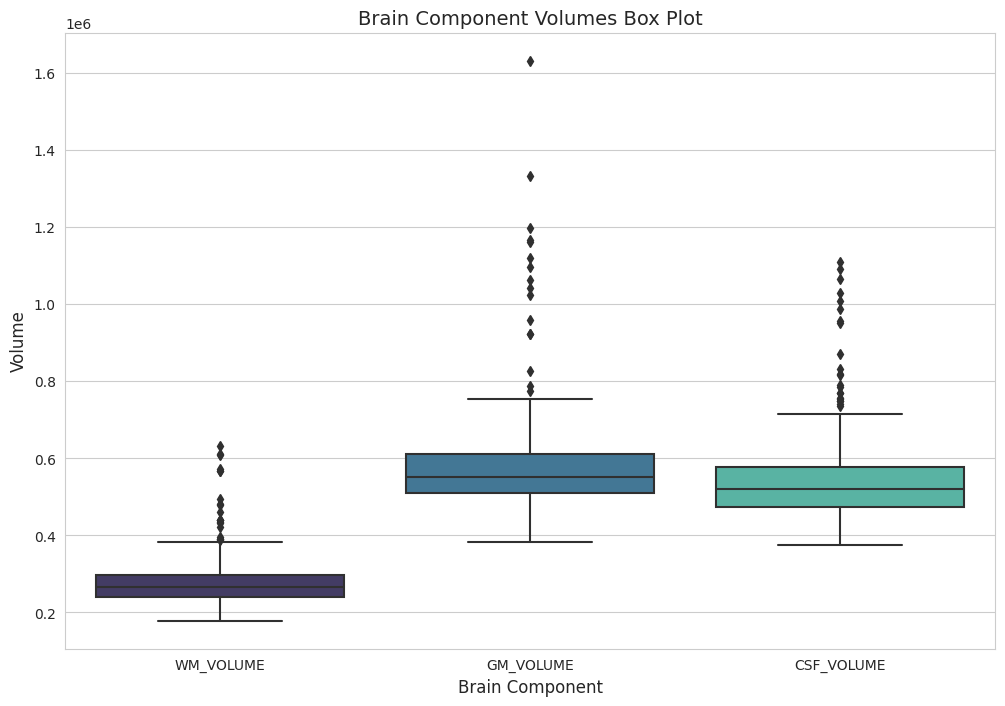

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
brain_vol_df = pd.read_csv('IXI-FSL-Cleaned.csv')

# Set seaborn style
sns.set_style("whitegrid")

# Melt for easy plotting
melted_df = brain_vol_df.melt(
    value_vars=['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME'],
    var_name='Brain Component',
    value_name='Volume')

# Color palette
palette = {
    "WM_VOLUME": sns.color_palette("mako", 3)[0],
    "GM_VOLUME": sns.color_palette("mako", 3)[1],
    "CSF_VOLUME": sns.color_palette("mako", 3)[2]}

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate box plots
sns.boxplot(data=melted_df, x='Brain Component', y='Volume',
            palette=palette, ax=ax)

# Add axis labels and title
ax.set_xlabel('Brain Component', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_title('Brain Component Volumes Box Plot', fontsize=14)

# Display plot
plt.show()

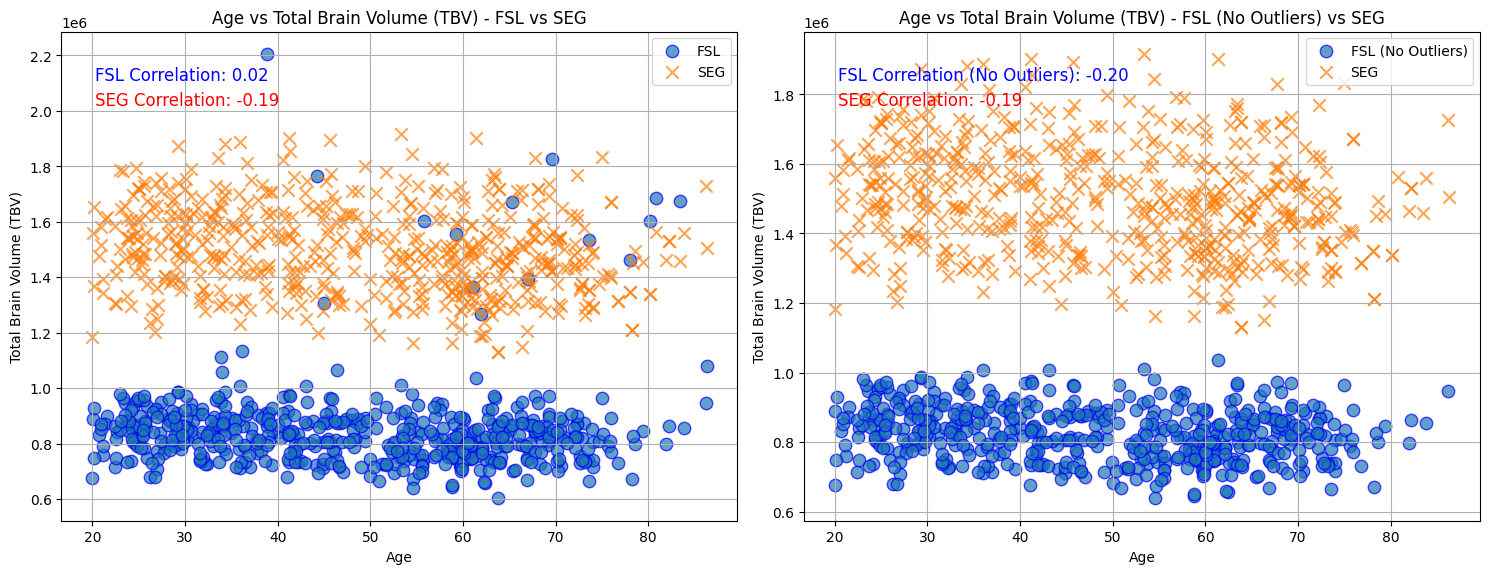

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
fsl_data = pd.read_csv('IXI-FSL.csv')
seg_data = pd.read_csv('IXI-SEG.csv')

# Extract necessary columns for plotting
fsl_age_tbv = fsl_data[['AGE', 'TBV']]
seg_age_tbv = seg_data[['AGE', 'TBV']]

# Calculate correlation coefficients
fsl_correlation = fsl_age_tbv['AGE'].corr(fsl_age_tbv['TBV'])
seg_correlation = seg_age_tbv['AGE'].corr(seg_age_tbv['TBV'])

# Remove outliers from FSL data using IQR method
Q1 = fsl_age_tbv['TBV'].quantile(0.25)
Q3 = fsl_age_tbv['TBV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fsl_age_tbv_no_outliers = fsl_age_tbv[(fsl_age_tbv['TBV'] >= lower_bound) & (fsl_age_tbv['TBV'] <= upper_bound)]

# Calculate correlation coefficients (using fsl_age_tbv_no_outliers DataFrame)
fsl_correlation_no_outliers = fsl_age_tbv_no_outliers['AGE'].corr(fsl_age_tbv_no_outliers['TBV'])

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot on the first subplot
axes[0].scatter(fsl_age_tbv['AGE'], fsl_age_tbv['TBV'], label='FSL', alpha=0.7, marker='o', edgecolors='b', s=80)
axes[0].scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Brain Volume (TBV)')
axes[0].set_title('Age vs Total Brain Volume (TBV) - FSL vs SEG')
axes[0].annotate(f'FSL Correlation: {fsl_correlation:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='b')
axes[0].annotate(f'SEG Correlation: {seg_correlation:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='r')
axes[0].legend()
axes[0].grid(True)

# Plot on the second subplot
axes[1].scatter(fsl_age_tbv_no_outliers['AGE'], fsl_age_tbv_no_outliers['TBV'], label='FSL (No Outliers)', alpha=0.7, marker='o', edgecolors='b', s=80)
axes[1].scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Total Brain Volume (TBV)')
axes[1].set_title('Age vs Total Brain Volume (TBV) - FSL (No Outliers) vs SEG')
axes[1].annotate(f'FSL Correlation (No Outliers): {fsl_correlation_no_outliers:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='b')
axes[1].annotate(f'SEG Correlation: {seg_correlation:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='r')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


This analysis highlights variations in volume calculations between the FSL and SynthSeg models for the same subjects. It becomes evident that the FSL module contains some outliers, which contribute to its lower volume correlation compared to the SynthSeg model. Specifically, the SynthSeg model exhibits a correlation of -0.19, which aligns with the expected trend of white matter decreasing as age increases.

After further examination, we conducted a data cleanup procedure by removing the outliers from the IXI-FSL.csv dataset. As a result, we observed a significant improvement in the volume correlation for the FSL model, with both models now showing practically matched correlations at approximately -0.20, with SynthSeg remaining at -0.19. These findings suggest that data preprocessing and outlier removal can play a crucial role in achieving more reliable and comparable results between the two models.

## Machine Learning Methods for Age-Volume Prediction

In this study, five machine learning models were tested to predict brain volumes using age and different brain metrics. The models included Linear Regression, Random Forest Regression, Extreme Gradient Boosting Regression (XGBRegressor), Light Gradient Boosting Machine Regressor (LGBMRegressor), and a 3D CNN model designed for FSL images. Linear Regression establishes a linear relationship, while Random Forest and XGBoost use ensemble techniques to handle non-linearities and improve accuracy. LGBMRegressor is a faster variant of gradient boosting, and the 3D CNN captures spatial information from FSL images.

The model uses two metrics to measure the accruacy of predictions:

1. Mean Absolute Error: $MAE = \frac{1}{n} \cdot Σ |yᵢ - ȳ|$ reflects how closely the model predicts ages are to the actual ages on average
<br>
2. $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{i} - \hat{y}{i})^{2}}{\sum{i=1}^{n} (y_{i} - \bar{y})^{2}}$ provides insight into how well the model captures the variance in age based on the provided volumes

The code loads the data, preprocesses it, performs train/test split, and standardizes the features. It then trains each model, evaluates its performance using R-squared and Mean Absolute Error, and plots the true age against the predicted age. The output shows how well each model predicts age using brain volume data.

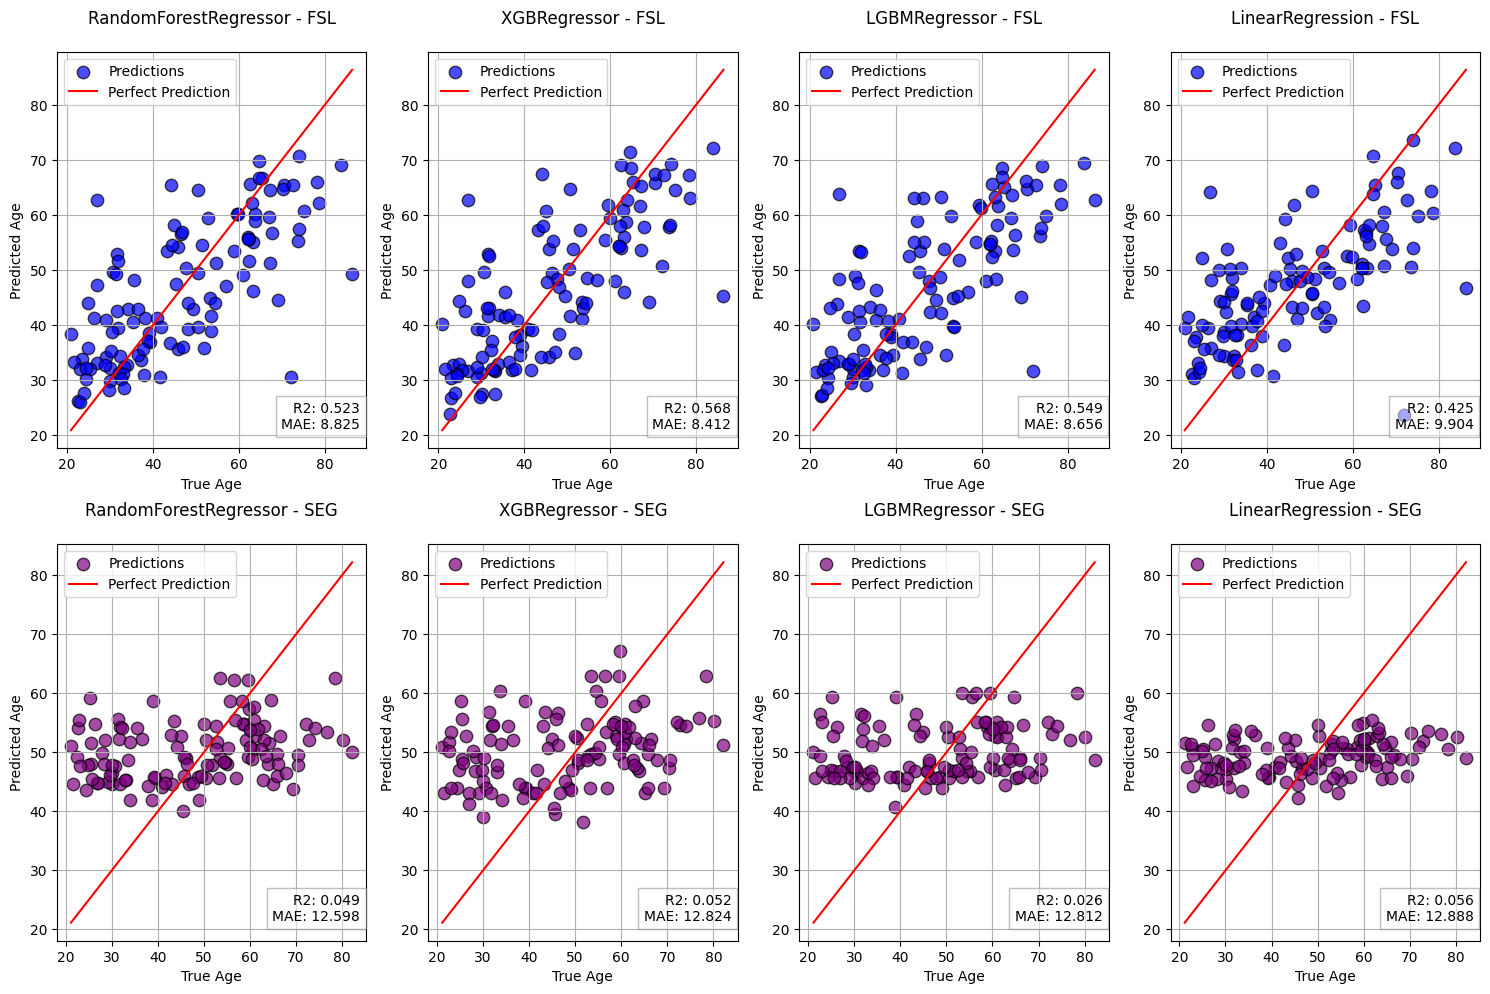

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Data and models
datasets = ['IXI-FSL.csv', 'IXI-SEG.csv']
models = {
    'FSL': [RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4),
            XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0),
            LGBMRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, num_leaves=10, force_col_wise=True, verbose=-1),
            LinearRegression()],
    'SEG': [RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4),
            XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0),
            LGBMRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, num_leaves=10, force_col_wise=True, verbose=-1),
            LinearRegression()]
}

# Colors for graphs
colors = {'FSL': 'blue', 'SEG': 'purple'}

results = {}  # Dictionary to store evaluation metrics

fig, axs = plt.subplots(len(datasets), len(models['FSL']), figsize=(15, 10))  # create a grid of plots
axs = axs.ravel()  # flatten the array for easy iterating

# add more space between plots
plt.subplots_adjust(hspace=0.5)

for i, dataset in enumerate(datasets):
    df = pd.read_csv(dataset)

    seg_name = 'FSL' if 'FSL' in dataset else 'SEG'

    # Extract features and target
    if seg_name == 'FSL':
        X = df[['CSF_VOLUME', 'GM_VOLUME', 'WM_VOLUME']]
    else:
        X = df[['TBV']]

    y = df['AGE']

    # Handle missing values
    X = X.fillna(X.mean())

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model training and evaluation
    for j, model in enumerate(models[seg_name]):
        model.fit(X_train, y_train)

        preds = model.predict(X_test)

        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)

        results[model.__class__.__name__ + f'-{seg_name}'] = {'R2': r2, 'MAE': mae}

        # Plot true vs predicted age
        ax = axs[i * len(models['FSL']) + j]  # select the current axis
        ax.scatter(y_test, preds, alpha=0.7, s=80, label='Predictions', color=colors[seg_name], edgecolors='k')
        ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Perfect Prediction')
        ax.set_xlabel('True Age')
        ax.set_ylabel('Predicted Age')
        ax.set_title(f'{model.__class__.__name__} - {seg_name}', y=1.05)  # Adjust the y-position of the title
        ax.text(0.98, 0.05, f'R2: {r2:.3f}\nMAE: {mae:.3f}', transform=ax.transAxes,
                 ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        ax.legend()
        ax.grid(True)

plt.tight_layout()  # improves appearance
plt.show()


| Segment Method | Rank | Model | R2 | MAE |
|---------------|------|-------|----|-----|
| FSL | 1 | XGBRegressor | 0.568 | 8.412 |
| FSL | 2 | LGBMRegressor | 0.549 | 8.656 |
| FSL | 3 | RandomForestRegressor | 0.522 | 8.799 |
| FSL | 4 | LinearRegression | 0.425 | 9.904 |
| SEG | 5 | LinearRegression | 0.056 | 12.888 |
| SEG | 6 | RandomForestRegressor | 0.053 | 12.561 |
| SEG | 7 | XGBRegressor | 0.052 | 12.824 |
| SEG | 8 | LGBMRegressor | 0.026 | 12.812 |


## Deep Learning Model for Age-Volume Prediction

The implemented 3D Convolutional Neural Network (CNN) for a regression task uses TensorFlow and Keras. The model is designed to work with 3D volumetric data and predict continuous values. It consists of several convolutional blocks with ReLU activation, batch normalization, and max-pooling layers to learn meaningful representations from the input data. Dropout is applied to prevent overfitting. The model is compiled with the Adam optimizer and mean squared error (MSE) loss. Custom data generators are used to generate batches during training, ensuring efficient memory utilization. The training process includes learning rate reduction and early stopping callbacks to optimize performance and prevent overfitting. Overall, the model is a powerful tool for regression tasks involving 3D data.

*Visualization of model architecture*

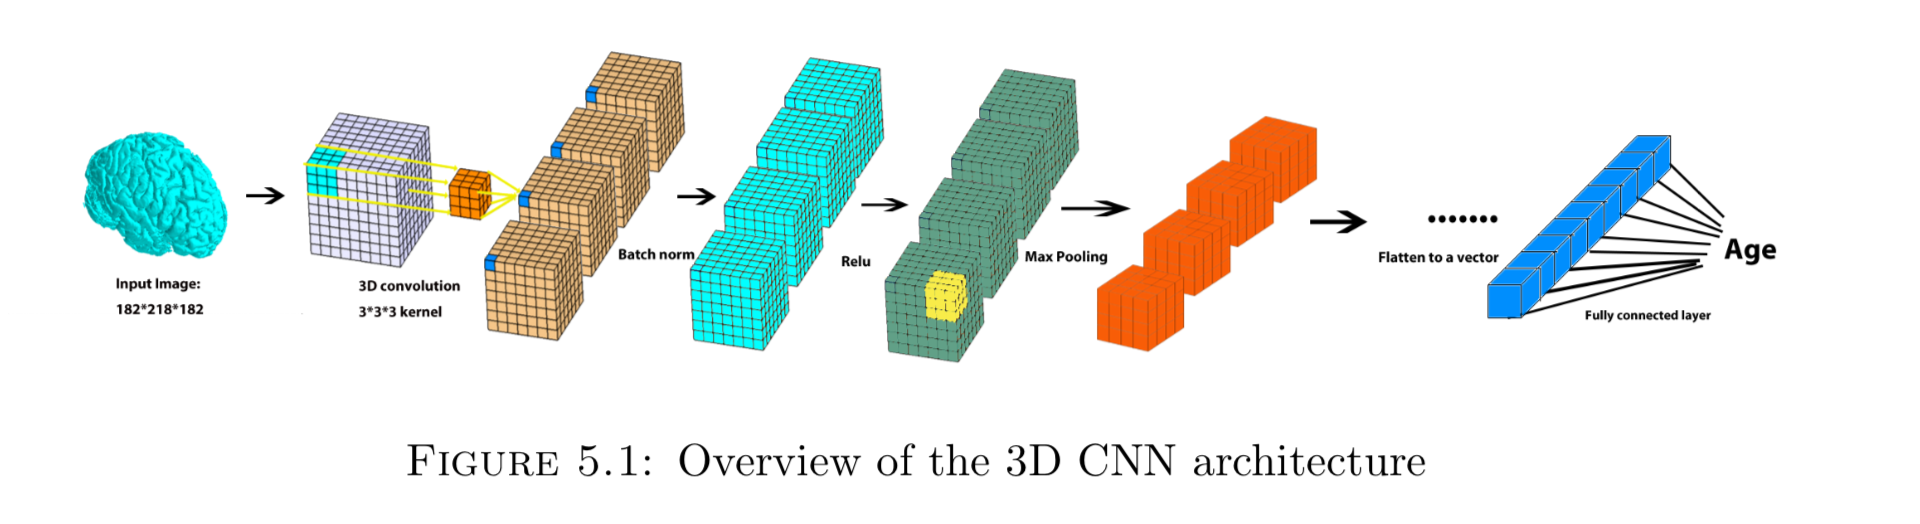

**White matter 3D CNN for IXI-FSL.csv**

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('preprocessed_data0.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


**Plot of True vs Predicted Age with perfect prediciton line of white matter IXI-FSL segmented images**

4/4 [==============================] - 1s 122ms/step


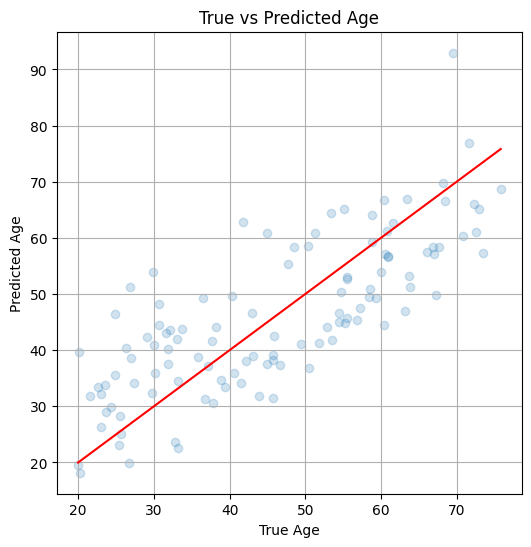

4/4 [==============================] - 2s 622ms/step
Mean Absolute Error (MAE): 8.598655541283744
Mean Squared Error (MSE): 100.91318239364956


In [ ]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")



**Gray matter 3D CNN for IXI-FSL segmented images**

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('preprocessed_data1.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


**Plot of True vs Predicted Age with perfect prediciton line of gray matter IXI-FSL segmented images**

4/4 [==============================] - 1s 262ms/step


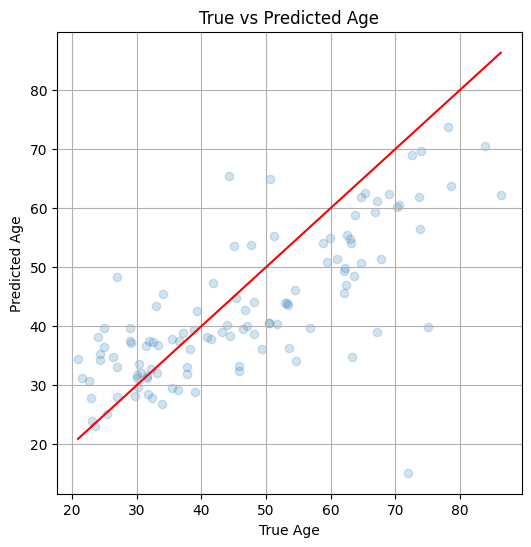

4/4 [==============================] - 2s 567ms/step
Mean Absolute Error (MAE): 8.83070656970539
Mean Squared Error (MSE): 140.08370673707034


In [ ]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")



The results obtained from the 3D CNN models, although more complex than previous models, showed little improvement in MAE from the predictions calculated in this notebook. There are several factors that may have affected the performance of the model. Firstly, the model architecture only allows for one set of segmented volume images to be uploaded for training and testing, unlike the other models that include white matter, gray matter, and cerebrospinal fluid volumes. Secondly, the sample size of the dataset is relatively small compared to that of other professional machine learning researchers for age-volume predictions. Lastly, the age distribution in the dataset is more prevalent in the 25-30 and 55-70 age brackets, resulting in higher accuracy among the higher distributions.

## Discussion and Conclusion

## Abstract